In [1]:
#general package
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from itertools import chain, combinations
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

import random
# import tensorflow as tf 

## Clearing out the Prediction Set

### Prediction set in a half-time model

In [2]:
#2021 & 2022 season dataset (double dataframe)
df_historical = pd.read_csv("~/Desktop/dissertation_dataset/double_dataframe.csv")
df_historical = df_historical.drop(columns=['choose_to_field', 'forced_to_field','forced_to_bat','month','day'])

# Create 'venue_city' column
df_historical['venue_city'] = df_historical['venue'] + ' ' + df_historical['city']

df_historical.drop(columns=['venue', 'city'], inplace=True)
desired_order = [
    'Result', 'match_number', 'team', 'opponent', 
    'gender', 'season', 'team_score', 'team_wickets', 
    'winner', 'toss_winner', 'home_advantage', 
    'venue_city', 'choose_to_bat', 'avg_score', 
    'avg_win_rate', 'avg_wickets_out', 'last_match_result'
]

df_historical = df_historical[desired_order]

In [3]:
df_historical = df_historical.sort_values(['team', 'gender', 'season', 'match_number'])

In [4]:
df_historical.head(10)

,Result,match_number,team,opponent,gender,season,team_score,team_wickets,winner,toss_winner,home_advantage,venue_city,choose_to_bat,avg_score,avg_win_rate,avg_wickets_out,last_match_result
2,lose,2,Birmingham Phoenix,London Spirit,female,2021,128,6,London Spirit,London Spirit,yes,"Edgbaston, Birmingham Birmingham",no,NaN,NaN,NaN,NaN
10,win,6,Birmingham Phoenix,Manchester Originals,female,2021,113,9,Birmingham Phoenix,Birmingham Phoenix,no,"Old Trafford, Manchester Manchester",yes,128.000000,0.000000,6.000000,lose
18,lose,11,Birmingham Phoenix,Southern Brave,female,2021,140,4,Southern Brave,Southern Brave,no,"The Rose Bowl, Southampton Southampton",no,120.500000,0.500000,7.500000,win
24,lose,14,Birmingham Phoenix,Trent Rockets,female,2021,134,9,Trent Rockets,Trent Rockets,yes,"Edgbaston, Birmingham Birmingham",no,127.000000,0.333333,6.333333,lose
32,lose,18,Birmingham Phoenix,Oval Invincibles,female,2021,129,9,Oval Invincibles,Birmingham Phoenix,yes,"Edgbaston, Birmingham Birmingham",yes,128.750000,0.250000,7.000000,lose
40,win,23,Birmingham Phoenix,Welsh Fire,female,2021,131,0,Birmingham Phoenix,Birmingham Phoenix,yes,"Edgbaston, Birmingham Birmingham",no,128.800000,0.200000,7.400000,lose
48,win,27,Birmingham Phoenix,Trent Rockets,female,2021,129,7,Birmingham Phoenix,Birmingham Phoenix,no,"Trent Bridge, Nottingham Nottingham",no,129.166667,0.333333,6.166667,win
56,win,31,Birmingham Phoenix,Northern Superchargers,female,2021,147,4,Birmingham Phoenix,Northern Superchargers,no,"Headingley, Leeds Leeds",no,129.142857,0.428571,6.285714,win
60,lose,40,Birmingham Phoenix,Oval Invincibles,female,2021,94,10,Oval Invincibles,Birmingham Phoenix,no,"Kennington Oval, London London",no,131.375000,0.500000,6.000000,win
132,win,4,Birmingham Phoenix,Welsh Fire,female,2022,161,5,Birmingham Phoenix,Welsh Fire,no,"Sophia Gardens, Cardiff Cardiff",no,127.222222,0.444444,6.444444,lose


In [5]:
#2023 season dataset (double dataframe)
df_2023 = pd.read_csv('~/Desktop/dissertation_dataset/halftime_2023.csv')
df_2023

,Result,match_number,team,opponent,toss_decision,gender,season,team_score,team_wickets,winner,toss_winner,home_advantage,venue_city,choose_to_bat,avg_score,avg_win_rate,avg_wickets_out,last_match_result
0,win,1,Southern Brave,Trent Rockets,bat,female,2023,157,6,Southern Brave,Trent Rockets,no,"Trent Bridge, Nottingham Nottingham",no,NaN,NaN,NaN,NaN
1,lose,1,Trent Rockets,Southern Brave,field,female,2023,130,7,Southern Brave,Trent Rockets,yes,"Trent Bridge, Nottingham Nottingham",yes,NaN,NaN,NaN,NaN
2,lose,4,Birmingham Phoenix,Northern Superchargers,bat,female,2023,110,8,Northern Superchargers,Northern Superchargers,no,"Headingley, Leeds Leeds",no,NaN,NaN,NaN,NaN
3,win,4,Northern Superchargers,Birmingham Phoenix,field,female,2023,112,3,Northern Superchargers,Northern Superchargers,yes,"Headingley, Leeds Leeds",yes,NaN,NaN,NaN,NaN
4,win,5,Welsh Fire,Southern Brave,bat,female,2023,165,3,Welsh Fire,Southern Brave,no,"The Rose Bowl, Southampton Southampton",no,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,lose,32,London Spirit,Birmingham Phoenix,field,male,2023,108,0,Birmingham Phoenix,London Spirit,no,"Edgbaston, Birmingham Birmingham",yes,NaN,NaN,NaN,NaN
112,lose,40,Southern Brave,Manchester Originals,bat,male,2023,196,1,Manchester Originals,Manchester Originals,no,"Kennington Oval, London London",yes,NaN,NaN,NaN,NaN
113,win,40,Manchester Originals,Southern Brave,field,male,2023,201,3,Manchester Originals,Manchester Originals,no,"Kennington Oval, London London",no,NaN,NaN,NaN,NaN
114,win,50,Oval Invincibles,Manchester Originals,bat,male,2023,161,5,Oval Invincibles,Manchester Originals,no,"Lord's, London London",yes,NaN,NaN,NaN,NaN


In [6]:
# Concatenate the historical and 2023 data frames
df_concat = pd.concat([df_historical, df_2023], ignore_index=True)
df_concat = df_concat.sort_values(['team', 'gender', 'season', 'match_number'])

# Calculate the four variables for the concatenated data frame
df_concat['Result_num'] = df_concat['Result'].map({'win': 1, 'lose': 0})

df_concat['avg_win_rate'] = df_concat.groupby(['team', 'gender'])['Result_num'].apply(lambda x: x.shift().expanding().mean())
df_concat['avg_score'] = df_concat.groupby(['team', 'gender'])['team_score'].apply(lambda x: x.shift().expanding().mean())
df_concat['avg_wickets_out'] = df_concat.groupby(['team', 'gender'])['team_wickets'].apply(lambda x: x.shift().expanding().mean())

df_concat['last_match_result'] = df_concat.groupby(['team', 'gender'])['Result'].shift()

/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_5253/565489794.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_concat['avg_win_rate'] = df_concat.groupby(['team', 'gender'])['Result_num'].apply(lambda x: x.shift().expanding().mean())
/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_5253/565489794.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the futu

In [7]:
df_concat.drop(['Result_num'], axis=1, inplace=True)
df_2023_updated = df_concat[df_concat['season'] == 2023]

In [8]:
# Filter the records for the team 'Southern Brave' in the updated 2023 dataset to check
df_2023_southern_brave = df_2023_updated[df_2023_updated['team'] == 'Southern Brave']
df_2023_southern_brave

,Result,match_number,team,opponent,gender,season,team_score,team_wickets,winner,toss_winner,home_advantage,venue_city,choose_to_bat,avg_score,avg_win_rate,avg_wickets_out,last_match_result,toss_decision
246,win,1,Southern Brave,Trent Rockets,female,2023,157,6,Southern Brave,Trent Rockets,no,"Trent Bridge, Nottingham Nottingham",no,121.941176,0.764706,5.000000,lose,bat
251,lose,5,Southern Brave,Welsh Fire,female,2023,161,4,Welsh Fire,Southern Brave,yes,"The Rose Bowl, Southampton Southampton",yes,123.888889,0.777778,5.055556,win,field
252,win,8,Southern Brave,Northern Superchargers,female,2023,102,5,Southern Brave,Southern Brave,yes,"The Rose Bowl, Southampton Southampton",yes,125.842105,0.736842,5.000000,lose,field
259,win,11,Southern Brave,London Spirit,female,2023,108,5,Southern Brave,Southern Brave,no,"Lord's, London London",yes,124.650000,0.750000,5.000000,win,field
271,win,17,Southern Brave,Welsh Fire,female,2023,145,8,Southern Brave,Southern Brave,no,"Sophia Gardens, Cardiff Cardiff",yes,123.857143,0.761905,5.000000,win,field
280,win,22,Southern Brave,Birmingham Phoenix,female,2023,132,4,Southern Brave,Southern Brave,yes,"The Rose Bowl, Southampton Southampton",yes,124.818182,0.772727,5.136364,win,bat
289,win,26,Southern Brave,Oval Invincibles,female,2023,132,3,Southern Brave,Oval Invincibles,yes,"The Rose Bowl, Southampton Southampton",no,125.130435,0.782609,5.086957,win,field
299,win,31,Southern Brave,Manchester Originals,female,2023,121,2,Southern Brave,Southern Brave,no,"Old Trafford, Manchester Manchester",yes,125.416667,0.791667,5.000000,win,field
302,win,50,Southern Brave,Northern Superchargers,female,2023,139,6,Southern Brave,Northern Superchargers,no,"Lord's, London London",yes,125.240000,0.800000,4.880000,win,bat
305,lose,1,Southern Brave,Trent Rockets,male,2023,127,0,Trent Rockets,Southern Brave,no,"Trent Bridge, Nottingham Nottingham",yes,133.411765,0.588235,5.529412,lose,field


In [9]:
df_2023_updated = df_2023_updated[df_2023_updated['toss_decision'] == "bat"] 

In [10]:
df_2023_updated = df_2023_updated.drop(columns=['toss_decision'])

In [11]:
df_2023_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 248 to 326
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Result             58 non-null     object 
 1   match_number       58 non-null     int64  
 2   team               58 non-null     object 
 3   opponent           58 non-null     object 
 4   gender             58 non-null     object 
 5   season             58 non-null     int64  
 6   team_score         58 non-null     int64  
 7   team_wickets       58 non-null     int64  
 8   winner             58 non-null     object 
 9   toss_winner        58 non-null     object 
 10  home_advantage     58 non-null     object 
 11  venue_city         58 non-null     object 
 12  choose_to_bat      58 non-null     object 
 13  avg_score          58 non-null     float64
 14  avg_win_rate       58 non-null     float64
 15  avg_wickets_out    58 non-null     float64
 16  last_match_result  58 non

In [12]:
df_2023_updated = df_2023_updated.sort_values(["season", "gender", "match_number"])

In [13]:
print(df_2023_updated.shape)

(58, 17)


In [14]:
df_2023_updated.reset_index(drop=True).to_csv('/Users/quinne/Desktop/dissertation_dataset/prediction_set_halftime_model.csv', index=False)

### Encoding transformations to the prediction set in the halftime model (same with the historical training set)

In [15]:
df_2023_updated = pd.read_csv('~/Desktop/dissertation_dataset/prediction_set_halftime_model.csv')

In [16]:
df_2023_updated

,Result,match_number,team,opponent,gender,season,team_score,team_wickets,winner,toss_winner,home_advantage,venue_city,choose_to_bat,avg_score,avg_win_rate,avg_wickets_out,last_match_result
0,win,1,Southern Brave,Trent Rockets,female,2023,157,6,Southern Brave,Trent Rockets,no,"Trent Bridge, Nottingham Nottingham",no,121.941176,0.764706,5.000000,lose
1,lose,4,Birmingham Phoenix,Northern Superchargers,female,2023,110,8,Northern Superchargers,Northern Superchargers,no,"Headingley, Leeds Leeds",no,124.533333,0.466667,6.400000,lose
2,win,5,Welsh Fire,Southern Brave,female,2023,165,3,Welsh Fire,Southern Brave,no,"The Rose Bowl, Southampton Southampton",no,118.857143,0.214286,6.785714,lose
3,lose,8,Northern Superchargers,Southern Brave,female,2023,100,8,Southern Brave,Southern Brave,no,"The Rose Bowl, Southampton Southampton",no,128.428571,0.500000,5.000000,win
4,lose,9,Oval Invincibles,Welsh Fire,female,2023,80,0,Welsh Fire,Welsh Fire,yes,"Kennington Oval, London London",no,118.437500,0.750000,4.687500,win
5,lose,10,Birmingham Phoenix,Manchester Originals,female,2023,87,0,Manchester Originals,Manchester Originals,no,"Old Trafford, Manchester Manchester",no,123.625000,0.437500,6.500000,lose
6,lose,11,London Spirit,Southern Brave,female,2023,104,5,Southern Brave,Southern Brave,yes,"Lord's, London London",no,115.714286,0.428571,6.142857,win
7,win,12,Northern Superchargers,Trent Rockets,female,2023,134,4,Northern Superchargers,Northern Superchargers,no,"Trent Bridge, Nottingham Nottingham",yes,126.533333,0.466667,5.200000,lose
8,win,13,Oval Invincibles,Manchester Originals,female,2023,128,7,Oval Invincibles,Manchester Originals,yes,"Kennington Oval, London London",no,116.176471,0.705882,4.411765,lose
9,win,14,Welsh Fire,Birmingham Phoenix,female,2023,137,7,Welsh Fire,Birmingham Phoenix,no,"Edgbaston, Birmingham Birmingham",no,119.375000,0.312500,6.562500,win


In [17]:
df_2023_updated.isna().sum()

Result               0
match_number         0
team                 0
opponent             0
gender               0
season               0
team_score           0
team_wickets         0
winner               0
toss_winner          0
home_advantage       0
venue_city           0
choose_to_bat        0
avg_score            0
avg_win_rate         0
avg_wickets_out      0
last_match_result    0
dtype: int64

In [18]:
df_2023_updated['Result'].unique()

array(['win', 'lose'], dtype=object)

In [19]:
# Convert 'Result' variable to binary class
df_2023_updated['Result'] = df_2023_updated['Result'].map({'win':1,'lose':0})

In [20]:
df_2023_updated['Result'].value_counts()

1    37
0    21
Name: Result, dtype: int64

In [21]:
df_2023_updated['gender'] = df_2023_updated['gender'].map({'female': 0, 'male': 1})
df_2023_updated['home_advantage'] = df_2023_updated['home_advantage'].map({'no': 0, 'yes': 1})
df_2023_updated['choose_to_bat'] = df_2023_updated['choose_to_bat'].map({'no': 0, 'yes': 1})
df_2023_updated['last_match_result'] = df_2023_updated['last_match_result'].map({'win': 1, 'lose': 0})

In [22]:
df_2023_updated['venue_city'].value_counts()

Trent Bridge, Nottingham Nottingham       8
The Rose Bowl, Southampton Southampton    8
Kennington Oval, London London            8
Lord's, London London                     8
Headingley, Leeds Leeds                   7
Sophia Gardens, Cardiff Cardiff           7
Old Trafford, Manchester Manchester       6
Edgbaston, Birmingham Birmingham          6
Name: venue_city, dtype: int64

In [23]:
team_to_city = {"Southern Brave": "The Rose Bowl, Southampton, Southampton", 
  "Oval Invincibles": "Kennington Oval, London, London",
  "Birmingham Phoenix": "Edgbaston, Birmingham, Birmingham",
  "Trent Rockets": "Trent Bridge, Nottingham, Nottingham", 
  "Manchester Originals": "Old Trafford, Manchester, Manchester", 
  "Northern Superchargers": "Headingley, Leeds, Leeds", 
  "London Spirit": "Lord's, London, London", 
  "Welsh Fire": "Sophia Gardens, Cardiff, Cardiff"}

all_teams = pd.concat([df_2023_updated['team'], df_2023_updated['opponent'], 
                       df_2023_updated['winner'], df_2023_updated['toss_winner']])

label_encoder = LabelEncoder()
label_encoder.fit(all_teams)

df_2023_updated['team_code'] = label_encoder.transform(df_2023_updated['team'])
df_2023_updated['opponent_code'] = label_encoder.transform(df_2023_updated['opponent'])
df_2023_updated['winner_code'] = label_encoder.transform(df_2023_updated['winner'])
df_2023_updated['toss_winner_code'] = label_encoder.transform(df_2023_updated['toss_winner'])

df_2023_updated['venue_city_code'] = df_2023_updated.apply(lambda row: row['team_code'] if row['venue_city'] == team_to_city.get(row['team'], "") else row['opponent_code'], axis=1)

In [24]:
label_encoder.classes_

array(['Birmingham Phoenix', 'London Spirit', 'Manchester Originals',
       'Northern Superchargers', 'Oval Invincibles', 'Southern Brave',
       'Trent Rockets', 'Welsh Fire'], dtype=object)

In [25]:
team_to_code_mapping = {team: code for code, team in enumerate(label_encoder.classes_)}
for team, code in team_to_code_mapping.items():
    print(f"{team}: {code}")

Birmingham Phoenix: 0
London Spirit: 1
Manchester Originals: 2
Northern Superchargers: 3
Oval Invincibles: 4
Southern Brave: 5
Trent Rockets: 6
Welsh Fire: 7


In [26]:
df_2023_updated.drop(columns=['team', 'opponent', 'winner', 'toss_winner', 'venue_city'], inplace=True)

In [27]:
new_order = ['Result', 
             'match_number', 'team_code', 'opponent_code',
             'gender','season',
             'team_score', 'team_wickets', 
             'winner_code','toss_winner_code',
             'home_advantage', 'venue_city_code', 
             'choose_to_bat', 
             'avg_score','avg_win_rate','avg_wickets_out','last_match_result']
df_2023_updated = df_2023_updated[new_order]

In [28]:
df_2023_updated.reset_index(drop=True).to_csv('/Users/quinne/Desktop/dissertation_dataset/prediction_set_encoding_halftime_model.csv', index=False)

In [29]:
df_2023_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Result             58 non-null     int64  
 1   match_number       58 non-null     int64  
 2   team_code          58 non-null     int64  
 3   opponent_code      58 non-null     int64  
 4   gender             58 non-null     int64  
 5   season             58 non-null     int64  
 6   team_score         58 non-null     int64  
 7   team_wickets       58 non-null     int64  
 8   winner_code        58 non-null     int64  
 9   toss_winner_code   58 non-null     int64  
 10  home_advantage     58 non-null     int64  
 11  venue_city_code    58 non-null     int64  
 12  choose_to_bat      58 non-null     int64  
 13  avg_score          58 non-null     float64
 14  avg_win_rate       58 non-null     float64
 15  avg_wickets_out    58 non-null     float64
 16  last_match_result  58 non-nu

### Prediction set in a full-time model

In [30]:
columns_to_keep = ['Result', 
                   "match_number", "team_code", "opponent_code", 
                   "gender", 'season', 
#                    'team_score', 'team_wickets', 
#                    'winner_code','toss_winner_code',
                   'home_advantage', 'venue_city_code', 
#                    'choose_to_bat', 
                   'avg_score','avg_win_rate','avg_wickets_out','last_match_result']
df_2023_full = df_2023_updated[columns_to_keep]

In [31]:
print(df_2023_full.shape)

(58, 12)


In [32]:
df_2023_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Result             58 non-null     int64  
 1   match_number       58 non-null     int64  
 2   team_code          58 non-null     int64  
 3   opponent_code      58 non-null     int64  
 4   gender             58 non-null     int64  
 5   season             58 non-null     int64  
 6   home_advantage     58 non-null     int64  
 7   venue_city_code    58 non-null     int64  
 8   avg_score          58 non-null     float64
 9   avg_win_rate       58 non-null     float64
 10  avg_wickets_out    58 non-null     float64
 11  last_match_result  58 non-null     int64  
dtypes: float64(3), int64(9)
memory usage: 5.6 KB


In [33]:
df_2023_full.head()

,Result,match_number,team_code,opponent_code,gender,season,home_advantage,venue_city_code,avg_score,avg_win_rate,avg_wickets_out,last_match_result
0,1,1,5,6,0,2023,0,6,121.941176,0.764706,5.000000,0
1,0,4,0,3,0,2023,0,3,124.533333,0.466667,6.400000,0
2,1,5,7,5,0,2023,0,5,118.857143,0.214286,6.785714,0
3,0,8,3,5,0,2023,0,5,128.428571,0.500000,5.000000,1
4,0,9,4,7,0,2023,1,7,118.437500,0.750000,4.687500,1


In [46]:
df_2023_full.reset_index(drop=True).to_csv('/Users/quinne/Desktop/dissertation_dataset/prediction_set_encoding_fulltime_model.csv', index=False)

### Base Model Dataset ('Random_Result')

In [102]:
df_2023_random = df_2023_updated.copy()
random_result_values = np.random.randint(0, 2, size=len(df_2023_random))

# Insert the new 'Random_Result' at the first position
df_2023_random.insert(loc=0, column='Random_Result', value=random_result_values)
df_2023_random.drop('Result', axis=1, inplace=True)

In [104]:
df_2023_random.head()

,Random_Result,match_number,team_code,opponent_code,gender,season,team_score,team_wickets,winner_code,toss_winner_code,home_advantage,venue_city_code,choose_to_bat,avg_score,avg_win_rate,avg_wickets_out,last_match_result
0,0,1,5,6,0,2023,157,6,5,6,0,6,0,121.941176,0.764706,5.000000,0
1,1,4,0,3,0,2023,110,8,3,3,0,3,0,124.533333,0.466667,6.400000,0
2,0,5,7,5,0,2023,165,3,7,5,0,5,0,118.857143,0.214286,6.785714,0
3,1,8,3,5,0,2023,100,8,5,5,0,5,0,128.428571,0.500000,5.000000,1
4,0,9,4,7,0,2023,80,0,7,7,1,7,0,118.437500,0.750000,4.687500,1


## Applying the prediction set to the models application with optimal parameters

In [83]:
df_bat = pd.read_csv('/Users/quinne/Desktop/dissertation_dataset/halftime_encode_python.csv')
df_bat

X_train = df_bat.drop("Result", axis=1)
y_train = df_bat['Result']

In [84]:
X_train.head()

,match_number,team_code,opponent_code,gender,season,team_score,team_wickets,winner_code,toss_winner_code,home_advantage,venue_city_code,choose_to_bat,avg_score,avg_win_rate,avg_wickets_out,last_match_result
0,5,4,1,0,2021,132,7,4,1,0,1,0,139.0,1.0,5.0,1
1,6,0,2,0,2021,113,9,0,0,0,2,1,128.0,0.0,6.0,0
2,7,3,6,0,2021,149,7,3,3,0,6,1,131.0,1.0,4.0,1
3,8,7,5,0,2021,110,7,5,5,1,5,0,130.0,0.0,8.0,0
4,10,6,1,0,2021,151,4,6,6,0,1,1,116.0,0.0,7.0,0


In [85]:
X_new_season_half = df_2023_updated.drop("Result", axis=1)
y_new_season_half = df_2023_updated['Result']

In [109]:
y_new_season_half.head()

0    1
1    0
2    1
3    0
4    0
Name: Result, dtype: int64

In [105]:
y_new_season_half_random = df_2023_random['Random_Result']
X_new_season_half_random = df_2023_random.drop('Random_Result', axis=1)

In [110]:
y_new_season_half_random.head()

0    0
1    1
2    0
3    1
4    0
Name: Random_Result, dtype: int64

## Half-time models

In [111]:
import tensorflow as tf

np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

In [112]:
## Step 1: Feature scaling
# Use the same scaler trained on the historical data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_new_season_half_scaled = scaler.transform(X_new_season_half)  
X_new_season_half_random_scaled = scaler.transform(X_new_season_half_random)  

### 1. KNN (K-Nearest Neighbors)

In [120]:
#Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'distance'}

# Train the model on historical data
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=14, weights='distance')
knn.fit(X_train_scaled, y_train)

# Apply the model to the new season data with random results
y_prob_new_season_knn_random = knn.predict_proba(X_new_season_half_random_scaled)[:, 1]
y_pred_new_season_knn_random = (y_prob_new_season_knn_random > 0.5).astype(int)

# Apply the model to the new season data
y_prob_new_season_knn = knn.predict_proba(X_new_season_half_scaled)[:, 1]
y_pred_new_season_knn = (y_prob_new_season_knn > 0.5).astype(int)

print("Predicted Probabilities for KNN in 2023 new season:")
print(y_prob_new_season_knn)

Predicted Probabilities for KNN in 2023 new season:
[0.567966   0.34334066 0.43540661 0.28094742 0.58362097 0.44384412
 0.41428619 0.47554525 0.59928069 0.5878778  0.51328008 0.57470838
 0.49280087 0.58476072 0.60249775 0.51886153 0.40816122 0.66511002
 0.27612333 0.50159255 0.58830343 0.36572434 0.20935299 0.73948688
 0.65638109 0.58929485 0.51146933 0.57893972 0.4093932  0.33790246
 0.38196816 0.55375749 0.50348352 0.60540318 0.553685   0.49510663
 0.5834053  0.20842387 0.57859426 0.78692432 0.34358603 0.5024845
 0.66576843 0.43313174 0.43194876 0.21379659 0.66162359 0.63328732
 0.58234427 0.21209636 0.56122393 0.13978772 0.20556156 0.4973464
 0.30983095 0.61841004 0.58558614 0.47973135]


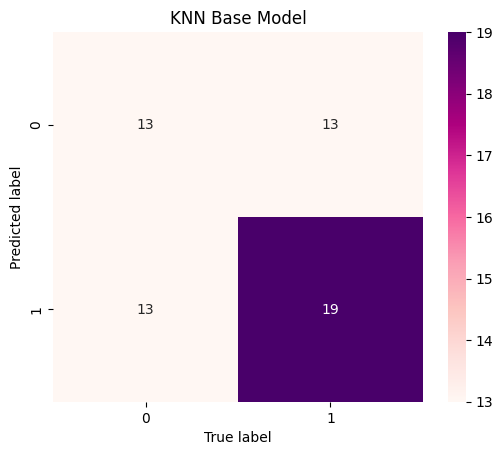

Accuracy (Base Model):	0.551724
F1-score (Base Model):	0.546875
Precision (Base Model):	0.546875
Recall (Base Model):		0.546875

Classification performance (Base Model):
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        26
           1       0.59      0.59      0.59        32

    accuracy                           0.55        58
   macro avg       0.55      0.55      0.55        58
weighted avg       0.55      0.55      0.55        58



In [121]:
# Confusion matrix for base model (KNN)
mat_knn_random = confusion_matrix(y_new_season_half_random, y_pred_new_season_knn_random)
sns.heatmap(mat_knn_random.T, square=True, annot=True, fmt="d", cmap="RdPu")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title("KNN Base Model")
plt.show()

print("Accuracy (Base Model):\t%f" % accuracy_score(y_new_season_half_random, y_pred_new_season_knn_random))
print("F1-score (Base Model):\t%f" % f1_score(y_new_season_half_random, y_pred_new_season_knn_random, average='macro'))
print("Precision (Base Model):\t%f" % precision_score(y_new_season_half_random, y_pred_new_season_knn_random, average='macro'))
print("Recall (Base Model):\t\t%f" % recall_score(y_new_season_half_random, y_pred_new_season_knn_random, average='macro'))
print("\nClassification performance (Base Model):\n%s" % classification_report(y_new_season_half_random, y_pred_new_season_knn_random))

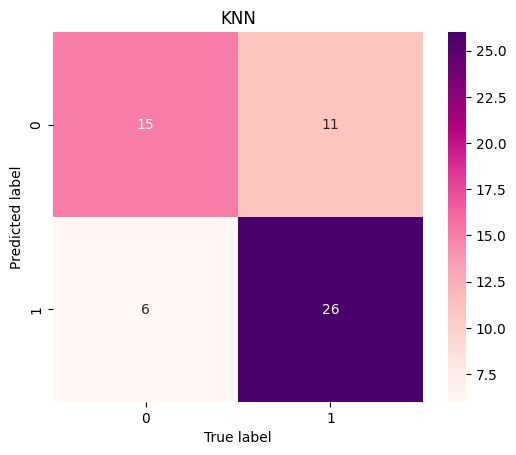

Accuracy:	0.706897
F1-score:	0.695961
Precision:	0.694712
Recall:		0.708494

Classification performance:
              precision    recall  f1-score   support

           0       0.58      0.71      0.64        21
           1       0.81      0.70      0.75        37

    accuracy                           0.71        58
   macro avg       0.69      0.71      0.70        58
weighted avg       0.73      0.71      0.71        58



In [122]:
# Confusion matrix for KNN
mat_knn = confusion_matrix(y_new_season_half, y_pred_new_season_knn)
sns.heatmap(mat_knn.T, square=True, annot=True, fmt="d", cmap="RdPu")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title("KNN")
plt.show()

print("Accuracy:\t%f" % accuracy_score(y_new_season_half, y_pred_new_season_knn))
print("F1-score:\t%f" % f1_score(y_new_season_half, y_pred_new_season_knn, average='macro'))
print("Precision:\t%f" % precision_score(y_new_season_half, y_pred_new_season_knn, average='macro'))
print("Recall:\t\t%f" % recall_score(y_new_season_half, y_pred_new_season_knn, average='macro'))
print("\nClassification performance:\n%s" % classification_report(y_new_season_half, y_pred_new_season_knn))

### 2. SVM (Support Vector Machine) 

In [59]:
#Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

#Train the model on historical data
svm = SVC(C=10, gamma='scale', kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train)

#Apply the model to the new season data
y_prob_new_season = svm.predict_proba(X_new_season_half_scaled)[:, 1]
y_pred_new_season = (y_prob_new_season > 0.5).astype(int)

print("Predicted Probabilities for SVM in 2023 season:")
print(y_prob_new_season)

Predicted Probabilities for SVM in 2023 season:
[0.73563343 0.05493971 0.55891142 0.18778702 0.78406076 0.5
 0.32911406 0.14367413 0.87829406 0.9695111  0.8053533  0.37142307
 0.77570631 0.8128205  0.95938769 0.83699582 0.12044759 0.93684546
 0.06941769 0.67001208 0.94354521 0.22454435 0.128436   0.98390121
 0.76666615 0.6722243  0.84487697 0.84971803 0.41460292 0.18828752
 0.753262   0.20998774 0.66638374 0.88011399 0.47305941 0.71394832
 0.84047633 0.12648409 0.74654127 0.93868132 0.57646445 0.44836207
 0.82001242 0.60104386 0.60408057 0.07657237 0.94132418 0.68607299
 0.90731994 0.12704608 0.78819462 0.06534675 0.13297101 0.24314353
 0.60934998 0.55511528 0.8529773  0.56583986]


In [60]:
y_pred_new_season

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1])

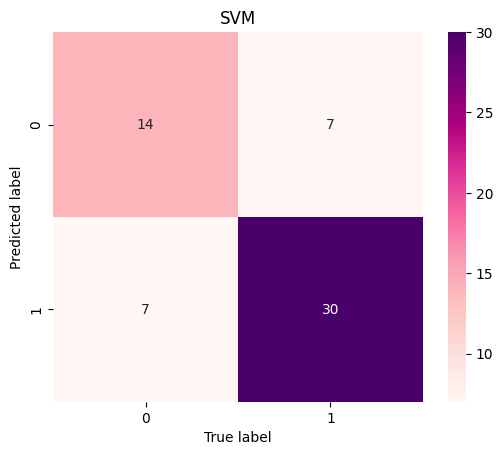

Accuracy:	0.758621
F1-score:	0.738739
Precision:	0.738739
Recall:		0.738739

Classification performance:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        21
           1       0.81      0.81      0.81        37

    accuracy                           0.76        58
   macro avg       0.74      0.74      0.74        58
weighted avg       0.76      0.76      0.76        58



In [61]:
# Confusion matrix for SVM
mat_svm = confusion_matrix(y_new_season_half, y_pred_new_season)
sns.heatmap(mat_svm.T, square=True, annot=True, fmt="d", cmap="RdPu")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title("SVM")
plt.show()

print("Accuracy:\t%f" % accuracy_score(y_new_season_half, y_pred_new_season))
print("F1-score:\t%f" % f1_score(y_new_season_half, y_pred_new_season, average='macro'))
print("Precision:\t%f" % precision_score(y_new_season_half, y_pred_new_season, average='macro'))
print("Recall:\t\t%f" % recall_score(y_new_season_half, y_pred_new_season, average='macro'))
print("\nClassification performance:\n%s" % classification_report(y_new_season_half, y_pred_new_season))

### 3. Deep Netural Networks

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [63]:
#Best parameters found:  {'activation': 'relu', 'batch_size': 20, 'dropout_rate': 0.2, 'epochs': 100}
#Best score 0.7583333373069763

# Define the model with the optimal parameters
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train the model on full historical data
model = create_model()
model.fit(X_train_scaled, y_train, epochs=100, batch_size=20, verbose=0)

# Apply the model to the new season data
y_prob_new_season_dnn = model.predict(X_new_season_half_scaled).flatten()
y_pred_new_season_dnn = (y_prob_new_season_dnn > 0.5).astype(int)

# Evaluate the model
print("DNN Model")
print("Predicted Probabilities in 2023 new season:")
print(y_prob_new_season_dnn)

2023-08-29 21:33:32.913842: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 0s 882us/step
DNN Model
Predicted Probabilities in 2023 new season:
[0.96555233 0.02416969 0.9664384  0.17240594 0.98858273 0.38526565
 0.28417355 0.7827725  0.48757842 0.96832114 0.93502986 0.4185561
 0.9098622  0.682058   0.86627656 0.98142385 0.32778376 0.84130734
 0.03366463 0.5629885  0.812144   0.22398488 0.06810232 0.96234554
 0.9777471  0.99050754 0.8627471  0.82975155 0.34990472 0.0829193
 0.09058742 0.516161   0.7832598  0.9838352  0.24876119 0.94899434
 0.70680356 0.00320567 0.46468988 0.99913234 0.6137348  0.20570967
 0.9949282  0.4966769  0.6173751  0.00713261 0.9956868  0.9537395
 0.4492383  0.08101846 0.5497238  0.0015137  0.06195604 0.11787122
 0.38525507 0.82546425 0.80647933 0.39575133]


In [64]:
y_pred_new_season_dnn 

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

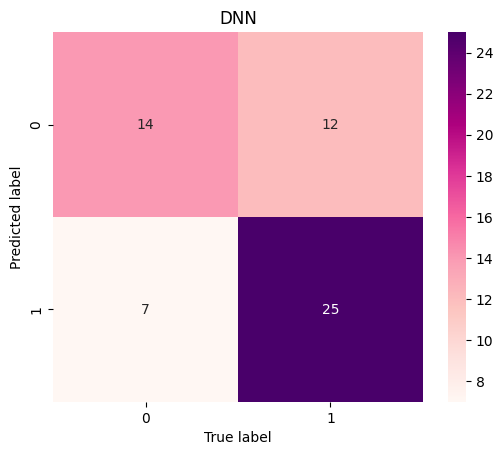

Accuracy:	0.672414
F1-score:	0.724638
Precision:	0.781250
Recall:		0.675676

Classification performance:
              precision    recall  f1-score   support

           0       0.54      0.67      0.60        21
           1       0.78      0.68      0.72        37

    accuracy                           0.67        58
   macro avg       0.66      0.67      0.66        58
weighted avg       0.69      0.67      0.68        58



In [65]:
# Confusion matrix
mat_dnn = confusion_matrix(y_new_season_half, y_pred_new_season_dnn)
sns.heatmap(mat_dnn.T, square=True, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("DNN")
plt.show()

print("Accuracy:\t%f" % accuracy_score(y_new_season_half, y_pred_new_season_dnn))
print("F1-score:\t%f" % f1_score(y_new_season_half, y_pred_new_season_dnn))
print("Precision:\t%f" % precision_score(y_new_season_half, y_pred_new_season_dnn))
print("Recall:\t\t%f" % recall_score(y_new_season_half, y_pred_new_season_dnn))
print("\nClassification performance:\n%s" % classification_report(y_new_season_half, y_pred_new_season_dnn))

### 4. XGBoost（Extreme Gradient Boosting）

In [66]:
import xgboost as xgb

In [67]:
#Best parameters for XGBoost:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.9}

xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.9, 
    learning_rate=0.05, 
    max_depth=3, 
    n_estimators=500, 
    subsample=0.9,
    use_label_encoder=False
)
xgb_model.fit(X_train, y_train)

y_prob_new_season_xgb = xgb_model.predict_proba(X_new_season_half)[:, 1]
y_pred_new_season_xgb = (y_prob_new_season_xgb > 0.5).astype(int)

# Step 3: Evaluate the model
print("\nPredicted Probabilities for XGBoost in 2023 new season:")
print(y_prob_new_season_xgb)

/Users/quinne/miniforge3/envs/tf/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Predicted Probabilities for XGBoost in 2023 new season:
[0.9886679  0.05137794 0.8702802  0.30187497 0.9467987  0.07985428
 0.03568773 0.4007409  0.75537074 0.2128822  0.22013605 0.22074543
 0.43362898 0.5588269  0.7304147  0.946146   0.13338602 0.8786544
 0.04464298 0.11713608 0.9161994  0.6663665  0.04847864 0.97787
 0.9690411  0.42333382 0.5664827  0.69344044 0.7165287  0.2605861
 0.11969002 0.04213867 0.62798554 0.9173437  0.31015134 0.10541995
 0.91533554 0.38520777 0.8636445  0.98642933 0.15501666 0.68329656
 0.8058648  0.9142448  0.9576681  0.01979082 0.97425735 0.9899921
 0.95432615 0.03969944 0.79654735 0.09831133 0.08110185 0.58295184
 0.06114799 0.76789004 0.25770152 0.9162875 ]


In [68]:
y_pred_new_season_xgb

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

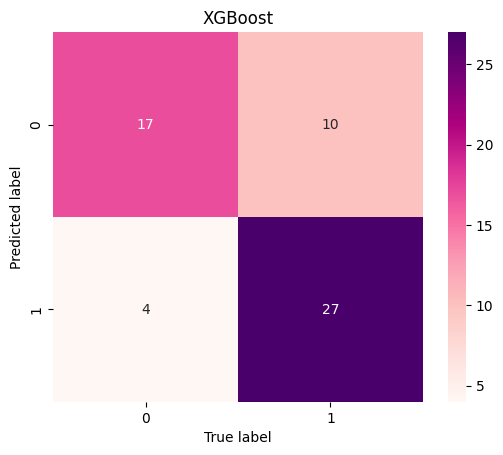

Accuracy:	0.758621
F1-score:	0.794118
Precision:	0.870968
Recall:		0.729730

Classification performance:
              precision    recall  f1-score   support

           0       0.63      0.81      0.71        21
           1       0.87      0.73      0.79        37

    accuracy                           0.76        58
   macro avg       0.75      0.77      0.75        58
weighted avg       0.78      0.76      0.76        58



In [69]:
# Confusion matrix
mat_xgb = confusion_matrix(y_new_season_half, y_pred_new_season_xgb)
sns.heatmap(mat_xgb.T, square=True, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("XGBoost")
plt.show()

print("Accuracy:\t%f" % accuracy_score(y_new_season_half, y_pred_new_season_xgb))
print("F1-score:\t%f" % f1_score(y_new_season_half, y_pred_new_season_xgb))
print("Precision:\t%f" % precision_score(y_new_season_half, y_pred_new_season_xgb))
print("Recall:\t\t%f" % recall_score(y_new_season_half, y_pred_new_season_xgb))
print("\nClassification performance:\n%s" % classification_report(y_new_season_half, y_pred_new_season_xgb))

### 5. CatBoost 

In [70]:
from catboost import CatBoostClassifier, Pool, cv
import catboost as cb

In [71]:
df= pd.read_csv('/Users/quinne/Desktop/dissertation_dataset/halftime_dataframe_R.csv')
df

,Result,match_number,team,opponent,gender,season,team_score,team_wickets,winner,toss_winner,home_advantage,venue_city,choose_to_bat,avg_score,avg_win_rate,avg_wickets_out,last_match_result
0,win,5,Oval Invincibles,London Spirit,female,2021,132,7,Oval Invincibles,London Spirit,no,"Lord's, London London",no,139.000000,1.000000,5.000000,win
1,win,6,Birmingham Phoenix,Manchester Originals,female,2021,113,9,Birmingham Phoenix,Birmingham Phoenix,no,"Old Trafford, Manchester Manchester",yes,128.000000,0.000000,6.000000,lose
2,win,7,Northern Superchargers,Trent Rockets,female,2021,149,7,Northern Superchargers,Northern Superchargers,no,"Trent Bridge, Nottingham Nottingham",yes,131.000000,1.000000,4.000000,win
3,lose,8,Welsh Fire,Southern Brave,female,2021,110,7,Southern Brave,Southern Brave,yes,"Sophia Gardens, Cardiff Cardiff",no,130.000000,0.000000,8.000000,lose
4,win,10,Trent Rockets,London Spirit,female,2021,151,4,Trent Rockets,Trent Rockets,no,"Lord's, London London",yes,116.000000,0.000000,7.000000,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,lose,30,London Spirit,Birmingham Phoenix,male,2022,139,6,Birmingham Phoenix,Birmingham Phoenix,yes,"Lord's, London London",no,140.642857,0.428571,6.571429,lose
111,win,31,Northern Superchargers,Southern Brave,male,2022,135,8,Northern Superchargers,Southern Brave,yes,"Headingley, Leeds Leeds",no,152.714286,0.428571,6.000000,win
112,lose,32,Oval Invincibles,Manchester Originals,male,2022,143,9,Manchester Originals,Oval Invincibles,no,"Old Trafford, Manchester Manchester",yes,145.500000,0.571429,5.785714,win
113,lose,40,London Spirit,Manchester Originals,male,2022,150,7,Manchester Originals,London Spirit,no,"The Rose Bowl, Southampton Southampton",yes,140.533333,0.400000,6.533333,lose


In [72]:
df_2023 = pd.read_csv('/Users/quinne/Desktop/dissertation_dataset/prediction_set_halftime_model.csv')
df_2023

,Result,match_number,team,opponent,gender,season,team_score,team_wickets,winner,toss_winner,home_advantage,venue_city,choose_to_bat,avg_score,avg_win_rate,avg_wickets_out,last_match_result
0,win,1,Southern Brave,Trent Rockets,female,2023,157,6,Southern Brave,Trent Rockets,no,"Trent Bridge, Nottingham Nottingham",no,121.941176,0.764706,5.000000,lose
1,lose,4,Birmingham Phoenix,Northern Superchargers,female,2023,110,8,Northern Superchargers,Northern Superchargers,no,"Headingley, Leeds Leeds",no,124.533333,0.466667,6.400000,lose
2,win,5,Welsh Fire,Southern Brave,female,2023,165,3,Welsh Fire,Southern Brave,no,"The Rose Bowl, Southampton Southampton",no,118.857143,0.214286,6.785714,lose
3,lose,8,Northern Superchargers,Southern Brave,female,2023,100,8,Southern Brave,Southern Brave,no,"The Rose Bowl, Southampton Southampton",no,128.428571,0.500000,5.000000,win
4,lose,9,Oval Invincibles,Welsh Fire,female,2023,80,0,Welsh Fire,Welsh Fire,yes,"Kennington Oval, London London",no,118.437500,0.750000,4.687500,win
5,lose,10,Birmingham Phoenix,Manchester Originals,female,2023,87,0,Manchester Originals,Manchester Originals,no,"Old Trafford, Manchester Manchester",no,123.625000,0.437500,6.500000,lose
6,lose,11,London Spirit,Southern Brave,female,2023,104,5,Southern Brave,Southern Brave,yes,"Lord's, London London",no,115.714286,0.428571,6.142857,win
7,win,12,Northern Superchargers,Trent Rockets,female,2023,134,4,Northern Superchargers,Northern Superchargers,no,"Trent Bridge, Nottingham Nottingham",yes,126.533333,0.466667,5.200000,lose
8,win,13,Oval Invincibles,Manchester Originals,female,2023,128,7,Oval Invincibles,Manchester Originals,yes,"Kennington Oval, London London",no,116.176471,0.705882,4.411765,lose
9,win,14,Welsh Fire,Birmingham Phoenix,female,2023,137,7,Welsh Fire,Birmingham Phoenix,no,"Edgbaston, Birmingham Birmingham",no,119.375000,0.312500,6.562500,win


In [73]:
df['Result'] = df['Result'].apply(lambda x: 1 if x == 'win' else 0)
df_2023['Result'] = df_2023['Result'].apply(lambda x: 1 if x == 'win' else 0)

# Splitting the data into X (features) and y (target)
X = df.drop(columns=['Result'])
y = df['Result']

X_new_season = df_2023.drop(columns=['Result'])
y_new_season = df_2023['Result']

# List of categorical features
cat_features = [
    'team', 'opponent', 'gender', 'home_advantage', 'venue_city', 
    'toss_winner', 'winner', 'choose_to_bat', 'last_match_result'
]

In [74]:
#Best parameters for CatBoost:  {'depth': 5, 'l2_leaf_reg': 1, 'iterations': 1000, 'learning_rate': 0.1}

model = CatBoostClassifier(
    depth=5, 
    l2_leaf_reg=1, 
    iterations=1000, 
    learning_rate=0.1,
    cat_features=cat_features,
    verbose=0  
)
model.fit(X, y)

y_prob_new_season_catboost = model.predict_proba(X_new_season)[:, 1]
y_pred_new_season_catboost = (y_prob_new_season_catboost > 0.5).astype(int)

print("\nPredicted Probabilities for CatBoost in 2023 new season:")
print(y_prob_new_season_catboost)


Predicted Probabilities for CatBoost in 2023 new season:
[9.99873313e-01 2.91172163e-04 9.94901120e-01 1.68405516e-04
 6.21736060e-02 1.39535067e-04 6.76250704e-05 9.99858911e-01
 9.99866448e-01 9.94004829e-01 9.99896372e-01 1.78352368e-04
 3.73474628e-04 9.99916770e-01 9.99879279e-01 9.96695875e-01
 9.97757429e-01 9.99863424e-01 1.70106626e-04 2.55058565e-04
 9.99846075e-01 1.89851911e-04 1.39255151e-04 9.95288568e-01
 9.99919169e-01 9.99538817e-01 1.54404731e-04 9.99523367e-01
 9.99847792e-01 9.99822840e-01 9.79911476e-01 6.52119067e-04
 9.99235981e-01 9.99730012e-01 9.99683896e-01 9.99831839e-01
 9.99902891e-01 5.86130370e-03 9.99916323e-01 9.99466643e-01
 1.97425341e-04 9.99824248e-01 9.99857766e-01 9.99712627e-01
 9.99904339e-01 1.12800641e-04 9.99888293e-01 9.99600322e-01
 9.99921143e-01 9.99770402e-01 9.99883906e-01 5.81304591e-03
 2.07600108e-04 7.81762901e-03 1.41463976e-04 9.99884482e-01
 4.57655394e-04 9.99951311e-01]


In [75]:
y_pred_new_season_catboost

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

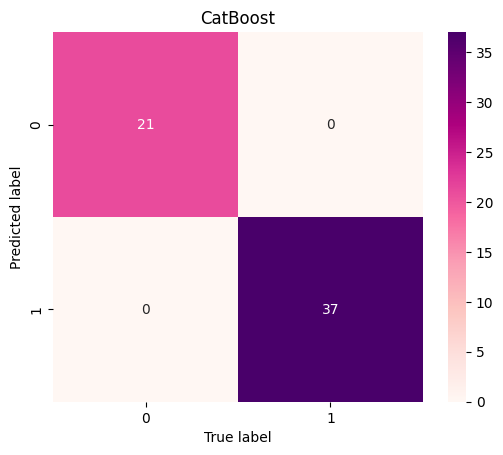

Accuracy:	1.000000
F1-score:	1.000000
Precision:	1.000000
Recall:		1.000000

Classification performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        37

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [76]:
mat_catboost = confusion_matrix(y_new_season, y_pred_new_season_catboost)
sns.heatmap(mat_catboost.T, square=True, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("CatBoost")
plt.show()

print("Accuracy:\t%f" % accuracy_score(y_new_season, y_pred_new_season_catboost))
print("F1-score:\t%f" % f1_score(y_new_season, y_pred_new_season_catboost))
print("Precision:\t%f" % precision_score(y_new_season, y_pred_new_season_catboost))
print("Recall:\t\t%f" % recall_score(y_new_season, y_pred_new_season_catboost))
print("\nClassification performance:\n%s" % classification_report(y_new_season, y_pred_new_season_catboost))